### Interpolação e diferenciação numérica (cap 4)

---

1. [Polinômio interpolador](#Polinômio-interpolador-(4.1)
    * [Matriz de Vandermonde](#Matriz-de-Vandermonde)
    * [Exercício 1](#Exercício-1:)
    * [Polinômio de Lagrange](#Polinômio-de-Lagrange)
    * [Diferenças divididas](#Diferenças-divididas)
    * [Exercício 2](#Exercício-2:)
    * [Exercício 3](#Exercício-3:)
    * [Exercício 4](#Exercício-4:)
    * [Exercício 5](#Exercício-5:)

2. [xxx](#Método-da-bisseção)
3. [xxx](#Método-de-Newton)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


## 28-08

### Polinômio interpolador (4.1)

Dado um conjunto de $n$ pontos $(x, y)$, o polinômio interpolador é um polinômio de grau $n-1$ que passa por todos os pontos da forma:

$f(x_{i}) = a_{0} + a_{1}x_{i} + a_{2}x_{i}^{2} + ... + a_{n}x_{i}^{n} = y_{i}$, para $i \in [1,n]$

Dadas as $n$ equações, temos um sistema linear da forma $Ac = y$, no qual queremos obter o vetor $c$ dos coeficientes da equação.

#### Matriz de Vandermonde

É a matriz $A$, com o primeiro elemento de cada linha $A_i$ igual a 1 e os demais elementos sendo as $n-1$ potências de $x_i$

In [2]:
np.vander([1,2,3])

array([[1, 1, 1],
       [4, 2, 1],
       [9, 3, 1]])

#### Exercício 1:

Determine o polinômio de grau 2 que passa por $P_0 = (0,-1)$, $P_1 = (1,1)$, $P_2(2,5)$.

In [3]:
grau = 2
pontos = [(0,-1), (1,1), (2,5)]
x1 = [0,0,0]

In [4]:
def Jacobi(A, b, x, threshold=1000):
    
    """
    Resolove o sistema linear pelo método de Jacobi.
    
    :param A: matriz nxn
    :param b: vetor nx1
    :param x: vetor inicial
    :param threshold: número máximo de iterações
    
    :returns: vetor solução do sistema, número de iterações
    """
    
    U = np.triu(A)
    np.fill_diagonal(U, 0)
    
    L = np.tril(A)
    np.fill_diagonal(L, 0)
    
    D = np.diag(np.diag(A))
    print(D)
    D_inv = np.linalg.inv(D) 
    
    t = 0
    while t < threshold:
        
        x = np.inner(D_inv, b - np.inner((L+U), x))
        t += 1
    
    return x, t

In [5]:
def interpol_jacobi(n, pontos, x):
    
    """
    Resolove o sistema linear pelo método de Jacobi.
    
    :param n: grau do polinômio
    :param pontos: lista com n+1 pontos (x,y)
    :param x: vetor inicial nx1
    :param threshold: número máximo de iterações
    
    :returns: coeficientes do polinômio, número de iterações
    """
    
    b = [i[1] for i in pontos]
    M = np.vander([i[0] for i in pontos], increasing=True)
    
    x, t = Jacobi(M, b, x)
    
    return x, t

In [6]:
interpol_jacobi(grau, pontos, x1)

[[1 0 0]
 [0 1 0]
 [0 0 4]]


(array([-1.,  1.,  1.]), 1000)

#### [Polinômio de Lagrange](https://pt.wikipedia.org/wiki/Polin%C3%B4mio_de_Lagrange)

Esse é outro método utilizado para a solução de polinômios interpoladores. 

O polinômio de Lagrange é da forma: 
$L(x) := \sum_{j=0}^{k} y_j l_j(x)$

Sendo $l_{j}(x):=\prod _{i=0,j\neq i}^{k}{\frac {x-x_{i}}{x_{j}-x_{i}}}={\frac {x-x_{0}}{x_{j}-x_{0}}}\cdots {\frac {x-x_{j-1}}{x_{j}-x_{j-1}}}{\frac {x-x_{j+1}}{x_{j}-x_{j+1}}}\cdots {\frac {x-x_{k}}{x_{j}-x_{k}}}$

#### Diferenças divididas

Outro método é calcularmos a interpolação recursivamente, adicionando um grau a cada ponto avaliado.

Tomando como exemplo o Exercício 1, escolhemos um dos pontos $(x, y)$ como inicial e começamos com um polinômio de grau $0$:

$p_0(x_0) = c_0$

$(x_0, y_0) = (0, -1) \rightarrow c_0 = -1$

Ao avaliarmos o próximo ponto, construimos o polinômio $p_1$ de grau $1$ a partir de $p_0$. 

Adicionamos um novo termo $c_{1}(x - x_0)$, essa diferença é necessária já que queremos que o novo polinômio interpole $(x_0, y_0)$.

$p_1(x) = p_0(x) + c_{1}(x - 0)$

$(x_1, y_1) = (1, 1) \rightarrow p_1(x_1) = -1 + c_{1} = 1 \rightarrow c_1 = 2$

Por último, adicionamos o termo de grau $2$: $c_{2}(x - x_{1})(x - x_{0})$, na mesma lógica de antes.

$p_2(x) = p_1(x) + c_{2}(x - x_{1})(x - x_{0})$

$(x_2, y_2) = (2, 5) \rightarrow p_2(x_2) = -1 + c_{1}2 + c_{2}(2 - 1)(2 - 0) = 5 \rightarrow c_2 = 1$

Logo, obtemos o polinômio $P(x) = p_2(x) = -1 + 2x + x(x-1)$


#### OBS 1: Em geral, $c_n = \frac{p_{n}(x_n) - p_{n-1}(x_n)}{\prod_{i = 0}^{n-1}(x_n - x_{i})} = \frac{y_n - p_{n-1}(x_n)}{\prod_{i = 0}^{n-1}(x_n - x_{i})}$.

Podemos expressar as diferenças divididas na forma: 

$c_0 = [y_0] = y_0$

$c_1 = [y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0}$

$c_2 = [y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_0]}{x_2 - x_0}$

...

Generalizando, temos $[y_i, ...,  y_k+1] = \frac{[y_{i+1}, ..., y_{k+1}] - [y_{i}, ..., y_k]}{x_{k+1} - x_i}$

#### OBS 2: A complexidade do método é $O(n^2)$, enquanto a resolução de um sistema linear seria de complexidade $O(n^3)$.

## 30-08

In [7]:
def generate_pol(M, pontos):
    
    """
    Gera o polinômio a partir da matriz das diferenças divididas e os pontos dados.
    
    :param M: matriz das diferenças divididas
    :param pontos: lista com n pontos (x, y)
    
    :return: polinômio interpolador
    """

    x = sp.Symbol('x')

    values = [i[0] for i in pontos]

    prod = 1
    exp = M[0][0] # Define c_0

    for i in range(len(M)-1): # Demais termos do polinômio

        prod = prod*(x - values[i])
        exp = exp + M[0][i+1]*prod
        
    exp = sp.simplify(exp)

    return exp

def interpol_dif_div(pontos):
    
    """
    Obtém o polinômio interpolador dos pontos através do método das diferenças divididas.
    
    :param pontos: lista com n pontos (x,y)
    
    :returns: polinômio interpoladro
    """
    
    y = [i[1] for i in pontos]
    x = [i[0] for i in pontos]
    
    M = np.identity(len(x))
    
    # Calcula a matriz das diferencas divididas 
    
    for j in range(len(x)): # Fixa a coluna
        for i in range(len(x), -1, -1): # Sobe nas linhas da matriz
            
            if i == j:
                M[i][j] = y[i] # [y_i] =  y_i
                
            elif j > i:

                M[i][j] = (M[i+1][j] - M[i][j-1])/(x[j]-x[i])
        
    print('Matriz das diferenças divididas:\n', M)
    exp = generate_pol(M, pontos)
    
    return exp

In [8]:
pontos

[(0, -1), (1, 1), (2, 5)]

In [9]:
interpol_dif_div(pontos)

Matriz das diferenças divididas:
 [[-1.  2.  1.]
 [ 0.  1.  4.]
 [ 0.  0.  5.]]


1.0*x**2 + 1.0*x - 1.0

**Exercício**: Interpole os pontos $P_0 = (1,-2), P_1 = (-2,56), P_2 = (0,-2), P_3 = (3,4)$.

In [10]:
pontos1 = [(1, -2), (-2, 56), (0, -2), (3, 4)]

Por diferenças divididas:

In [11]:
pol = interpol_dif_div(pontos1)
pol

Matriz das diferenças divididas:
 [[ -2.         -19.33333333   9.66666667  -1.73333333]
 [  0.          56.         -29.           6.2       ]
 [  0.           0.          -2.           2.        ]
 [  0.           0.           0.           4.        ]]


-1.73333333333333*x**3 + 7.93333333333333*x**2 - 6.2*x - 2.0

In [12]:
# Testando: P_0 = (-2, 56)
x = sp.Symbol('x')
pol.evalf(subs={x: -2})

56.0000000000000

Por sistema linear:

In [13]:
x = [0,0,0,0]
grau = 3
interpol_jacobi(grau, pontos1, x)

[[ 1  0  0  0]
 [ 0 -2  0  0]
 [ 0  0  0  0]
 [ 0  0  0 27]]


LinAlgError: Singular matrix

#### Exercício 2:
Implemente o método de diferenças divididas para encontrar um polinômio interpolador.
Aplique-o para encontrar um polinômio que interpola uma amostra da função 𝑓(𝑥) = 𝑐𝑜𝑠(𝜋𝑥),
onde os pontos da amostra são 10 pontos uniformemente distribuídos entre −1 e 1

In [14]:
x2 = [(i, np.cos(np.pi*i)) for i in np.linspace(-1, 1, 10)]
x2

[(-1.0, -1.0),
 (-0.7777777777777778, -0.7660444431189779),
 (-0.5555555555555556, -0.1736481776669303),
 (-0.33333333333333337, 0.4999999999999999),
 (-0.11111111111111116, 0.9396926207859083),
 (0.11111111111111116, 0.9396926207859083),
 (0.33333333333333326, 0.5000000000000003),
 (0.5555555555555554, -0.17364817766692964),
 (0.7777777777777777, -0.7660444431189779),
 (1.0, -1.0)]

In [15]:
f2 = interpol_dif_div(x2)
f2

Matriz das diferenças divididas:
 [[-1.00000000e+00  1.05280001e+00  3.62921217e+00 -4.20980484e+00
  -6.49584666e-01  2.26799025e+00 -5.90748561e-01 -3.33961435e-01
   1.87853307e-01 -1.69864123e-14]
 [ 0.00000000e+00 -7.66044443e-01  2.66578319e+00  8.22675611e-01
  -4.78721344e+00  1.87040450e+00  1.48032550e+00 -1.11024413e+00
   1.71291552e-14  1.87853307e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.73648178e-01  3.03141680e+00
  -2.36880001e+00 -3.12463166e+00  3.51521062e+00 -8.79296636e-15
  -1.11024413e+00  3.33961435e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-01
   1.97861679e+00 -4.45188779e+00  1.33226763e-15  3.51521062e+00
  -1.48032550e+00 -5.90748561e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.39692621e-01  0.00000000e+00 -4.45188779e+00  3.12463166e+00
   1.87040450e+00 -2.26799025e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  9.39692621e-01 -1.97861679e+00 -2.36880001e+00

-1.69864122767649e-14*x**9 + 0.187853307357802*x**8 + 3.48795066903076e-14*x**7 - 1.30505496429025*x**6 - 2.23468934258063e-14*x**5 + 4.05146492545646*x**4 + 4.3541249606119e-15*x**3 - 4.93425759382636*x**2 - 2.14800794050421e-15*x + 0.999994325302346

In [16]:
# Coeficientes do polinômio interpolador
coeffs2 = sp.Poly(f2).coeffs()
coeffs2

[-1.69864122767649e-14,
 0.187853307357802,
 3.48795066903076e-14,
 -1.30505496429025,
 -2.23468934258063e-14,
 4.05146492545646,
 4.35412496061190e-15,
 -4.93425759382636,
 -2.14800794050421e-15,
 0.999994325302346]

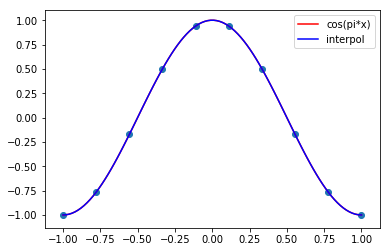

In [45]:
t2 = np.linspace(-1, 1, 100)

a2 = np.cos(np.pi*t2)
b2 = list(map(lambda x: np.inner(coeffs2, [x**i for i in reversed(range(len(coeffs2)))]), t2))

plt.plot(t2, a2, 'r', label='cos(pi*x)')
plt.plot(t2, b2, 'b', label='interpol')
plt.scatter(*zip(*x2)) # pontos

plt.legend()
plt.show()

#### Exercício 3:

Encontre um polinômio que interpola uma amostra da função $r(x)=11+25x^2$, onde os pontos da amostra são 10 pontos uniformemente distribuídos entre −1 e 1.

In [18]:
x3 = [(i, 11+25*(i**2)) for i in np.linspace(-1, 1, 10)]
x3

[(-1.0, 36.0),
 (-0.7777777777777778, 26.123456790123456),
 (-0.5555555555555556, 18.71604938271605),
 (-0.33333333333333337, 13.777777777777779),
 (-0.11111111111111116, 11.308641975308642),
 (0.11111111111111116, 11.308641975308642),
 (0.33333333333333326, 13.777777777777777),
 (0.5555555555555554, 18.716049382716044),
 (0.7777777777777777, 26.123456790123452),
 (1.0, 36.0)]

In [19]:
f3 = interpol_dif_div(x3)
f3

Matriz das diferenças divididas:
 [[ 3.60000000e+01 -4.44444444e+01  2.50000000e+01 -1.06581410e-13
   1.79856130e-13 -2.21223040e-13  2.14478435e-13 -1.74299860e-13
   1.22920424e-13 -7.24352498e-14]
 [ 0.00000000e+00  2.61234568e+01 -3.33333333e+01  2.50000000e+01
   5.32907052e-14 -6.59472477e-14  6.47482068e-14 -5.66546809e-14
   4.42253377e-14 -2.19500757e-14]
 [ 0.00000000e+00  0.00000000e+00  1.87160494e+01 -2.22222222e+01
   2.50000000e+01 -5.32907052e-15  5.99520433e-15 -1.07913678e-14
   1.21402888e-14  5.20298090e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.37777778e+01
  -1.11111111e+01  2.50000000e+01  0.00000000e+00 -5.99520433e-15
   5.39568390e-15  2.02338146e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.13086420e+01  0.00000000e+00  2.50000000e+01 -5.32907052e-15
   0.00000000e+00  3.23741034e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.13086420e+01  1.11111111e+01  2.50000000e+01

-7.24352497625895e-14*x**9 + 5.04851740769556e-14*x**8 + 1.19343374468554e-13*x**7 - 7.46121914252379e-14*x**6 - 5.1694586111761e-14*x**5 + 2.4806719178816e-14*x**4 + 4.83854028272227e-15*x**3 + 25.0*x**2 - 8.41570805547544e-16*x + 11.0

In [20]:
# Coeficientes do polinômio interpolador
coeffs3 = sp.Poly(f3).coeffs()

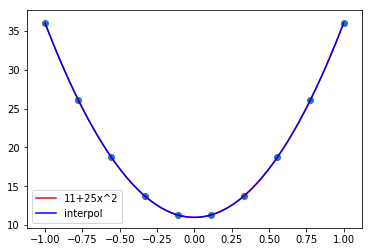

In [47]:
t3 = np.linspace(-1, 1, 100)

a3 = list(map(lambda x: 11+25*(x**2), t3))
b3 = list(map(lambda x: np.inner(coeffs3, [x**i for i in reversed(range(len(coeffs3)))]), t3))

plt.plot(t3, a3, 'r', label='11+25x^2')
plt.plot(t3, b3, 'b', label='interpol')
plt.scatter(*zip(*x3)) # pontos

plt.legend()
plt.show()

#### Exercício 4: 
Encontre um polinômio que interpola uma amostra da função $n(x) = \frac{1}{\sqrt{2\pi}} \exp^{\frac{-x^2}{2}}$ onde os pontos
da amostra são 10 pontos uniformemente distribuídos entre −4 e 4. Use este polinômio para
estimar $Pr(|Z| ≤ 1)$, onde $Z$ é uma variável aleatória normal padrão (média zero e desvio padrão
1)

In [51]:
x4 = [(i, np.e**(-i**2/2)/np.sqrt(2*np.pi)) for i in np.linspace(-4, 4, 10)]
x4

[(-4.0, 0.00013383022576488542),
 (-3.111111111111111, 0.0031560163164180447),
 (-2.2222222222222223, 0.03377365103527064),
 (-1.3333333333333335, 0.16401007467599363),
 (-0.44444444444444464, 0.3614238298827435),
 (0.44444444444444464, 0.3614238298827435),
 (1.333333333333333, 0.1640100746759937),
 (2.2222222222222214, 0.03377365103527072),
 (3.1111111111111107, 0.0031560163164180504),
 (4.0, 0.00013383022576488542)]

In [52]:
f4 = interpol_dif_div(x4)
f4

Matriz das diferenças divididas:
 [[ 1.33830226e-04  3.39995935e-03  1.74627448e-02  1.70914763e-02
  -6.97218361e-03 -1.91743511e-03  1.75817986e-03 -5.07349389e-04
   7.13460079e-05  2.20228566e-20]
 [ 0.00000000e+00  3.15601632e-03  3.44448391e-02  6.30400149e-02
  -7.69850990e-03 -1.54941174e-02  7.45952417e-03 -1.39866078e-03
  -3.83342911e-19  7.13460079e-05]
 [ 0.00000000e+00  0.00000000e+00  3.37736510e-02  1.46515977e-01
   4.25106551e-02 -6.27887052e-02  1.76593233e-02  3.90312782e-18
  -1.39866078e-03  5.07349389e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.64010075e-01
   2.22090475e-01 -1.24925892e-01 -1.04083409e-17  1.76593233e-02
  -7.45952417e-03  1.75817986e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.61423830e-01  0.00000000e+00 -1.24925892e-01  6.27887052e-02
  -1.54941174e-02  1.91743511e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.61423830e-01 -2.22090475e-01  4.25106551e-02

2.20228566286118e-20*x**9 + 7.13460078896708e-5*x**8 - 6.90676939509284e-19*x**7 - 0.00258247602341836*x**6 + 1.26257251618019e-18*x**5 + 0.0328243180006407*x**4 - 4.98972288824601e-17*x**3 - 0.1810454180312*x**2 + 1.01634134096829e-16*x + 0.395924929425097

In [53]:
# Coeficientes do polinômio interpolador
coeffs4 = sp.Poly(f4).coeffs()

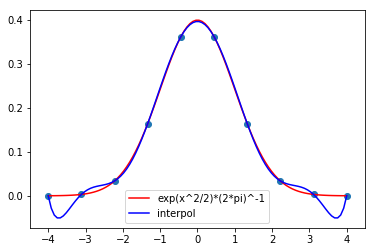

In [55]:
t4 = np.linspace(-4, 4, 100)

a4 = list(map(lambda i: np.e**(-i**2/2)/np.sqrt(2*np.pi), t4))
b4 = list(map(lambda x: np.inner(coeffs4, [x**i for i in reversed(range(len(coeffs4)))]), t4))

plt.plot(t4, a4, 'r', label='exp(x^2/2)*(2*pi)^-1')
plt.plot(t4, b4, 'b', label='interpol')
plt.scatter(*zip(*x4)) # pontos

plt.legend()
plt.show()

Sabemos que $Pr(|Z| \leq 1) = \int_{-1}^{1}{n(x) dx} = 2\int_{0}^{1}{n(x) dx}$, pois $n(x)$ é uma função par. Logo, usando o polinômio interpolador, podemos estimar:

In [58]:
f4

2.20228566286118e-20*x**9 + 7.13460078896708e-5*x**8 - 6.90676939509284e-19*x**7 - 0.00258247602341836*x**6 + 1.26257251618019e-18*x**5 + 0.0328243180006407*x**4 - 4.98972288824601e-17*x**3 - 0.1810454180312*x**2 + 1.01634134096829e-16*x + 0.395924929425097

[Usar integrate.quad](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

In [65]:
from scipy import integrate

P = 2*integrate.quad(lambda x: np.inner(coeffs4, [x**i for i in reversed(range(len(coeffs4)))]), 0, 1)
P

(0.3417803225361656,
 3.794523834434633e-15,
 0.3417803225361656,
 3.794523834434633e-15)

#### Exercício 5:
Seja 𝑓 uma função analítica. Mostre que o polinômio interpolador que passa por (0, 𝑓(0)),
(𝑑𝑥, 𝑓(𝑑𝑥)) e (2𝑑𝑥, 𝑓(2𝑑𝑥)) converge para o polinômio de Taylor de 𝑓 em torno do 𝑎 = 0
quando 𝑑𝑥 → 0.